In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi = np.pi

In [2]:
def integrate(f, b, xt, dt):
    k1 = dt * f(xt, b)
    k2 = dt * f(xt+k1/2., b)
    k3 = dt * f(xt+k2/2., b)
    k4 = dt * f(xt+k3, b)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4) 
    return new_xt

def f_xdot(xt, b):
    xdot = np.array([[0, 1], [-1, -b]])
    return xdot@xt

In [3]:
def phi(x, mu, sigma):
    det = np.linalg.det(2*pi*sigma)**(-0.5)
    expo = np.exp(-0.5*((x-mu).T)@np.linalg.inv(sigma)@(x-mu))
    return det*expo

In [4]:
def klist(k1, k2):
    k = list()
    for i in range(k1):
        for j in range(k2):
            k.append(np.array([i, j]))
    return k

def lambdalist(klist):
    lam = list()
    n = len(klist)
    s = (n+1)/2
    for i in range(n):
        lam_k = (1 + np.linalg.norm(klist[i])**2)**(-s)
        lam.append(lam_k)
    return lam
        

In [5]:
def F_k(x, k, a, b):
    h = 1
    fk = 1
    for i in range(2):
        kbar = (k[i]*pi)/(b[i] - a[i])
        prod = np.cos(kbar*(x[i] - a[i]))
        fk *= prod
    fk = (1/h)*fk
    return fk


In [6]:
def phi_k(a, b, k):
    dx0 = 0.01
    dx1 = 0.01
    dim0 = b[0] - a[0]
    dim1 = b[1] - a[1]
    N0 = int(dim0/dx0)
    N1 = int(dim1/dx1)

    sum = 0
    
    for i in range(N0):
        for j in range(N1):
            phii = phi(np.array([a[0]+i*dx0, a[1]+j*dx1]), mu, sigma)
            Fk = F_k(np.array([a[0]+i*dx0, a[1]+j*dx1]), k, a, b)
            sum += phii*Fk*dx0*dx1
    return sum

In [7]:
def c_k(x, k, a, b):
    T = len(x[0])
    sum = 0
    for i in range(T):
        sum += F_k(x[:,i], k, a, b)*dt
    return (1/T)*sum

In [8]:
def ergotic(x, a, b, klist, lamdalist):
    erg_sum = 0
    for i in range(len(klist)):
        k = klist[i]
        lam = lamdalist[i]
        c = c_k(x, k, a, b)
        phik = phi_k(a, b, k)
        erg_sum += lam*(c - phik)**2
    return erg_sum
        

In [13]:
x0 = np.array([0, 1])
sigma = np.diag((2,2))
T = 100
dt = 0.1
SIZE = int(T/dt)-1
mu = np.array([0,0])
b = np.linspace(0, 2, 20)
erg_arr = np.zeros(len(b))
k = klist(3, 3)
lam = lambdalist(k)

In [14]:
for i in range(len(b)):
    bi = b[i]
    x = np.zeros([2, SIZE])
    x[:,0] = x0
    for j in range(1, SIZE):
        x[:,j] = integrate(f_xdot, bi, x[:,j-1], dt)
    alist = [np.amin(x[0,:]),np.amin(x[1,:])]
    blist = [np.amax(x[0,:]),np.amax(x[1,:])]
    erg_arr[i] = ergotic(x, alist, blist, k, lam)
    print(erg_arr[i])
    


0.028435906027468743
0.01435076498690844
0.00640863196568843
0.0025805743093336906
0.0007735754993367645
0.00020911860188444823
0.000263016677173582
0.0006394805719708728
0.0011814458003972532
0.0017190698740228998
0.002323522548399116
0.0028209517238478284
0.0033011518426721317
0.0037944001363805426
0.004200358753698508
0.00447574266440849
0.004779248768976192
0.0050495934674545575
0.005211846544938971
0.005480223438212762


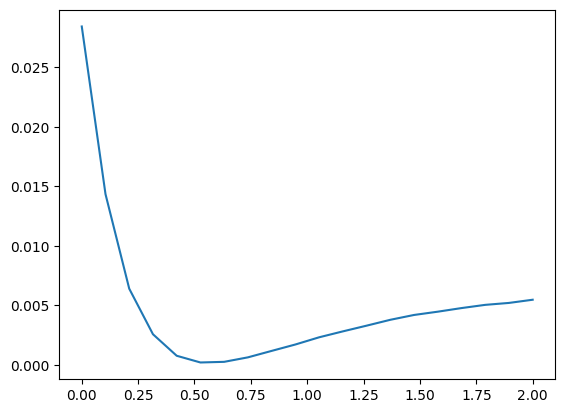

In [15]:
plt.plot(b, erg_arr)

In [11]:
bs = np.zeros((5,50))
Es = np.zeros((5,50))

for Ti in range(5):
    T = Ti*10+20
    dt = 0.1
    N = int(T/dt) + 1

    for m in range(50):
        b = m/25
        bs[Ti,m] = b

        x0 = np.array([0,1])

        x = np.zeros((2,N))
        x[:,0] = x0

        for i in range(N-1):
            x[:,i+1] = integrate(f_xdot,b,x[:,i],dt)

        a_list = [np.amin(x[0,:]),np.amin(x[1,:])]
        b_list = [np.amax(x[0,:]),np.amax(x[1,:])]

        Es[Ti,m] = ergotic(x,a_list,b_list, k, lam)
        #print(Es[Ti, m])

0.0

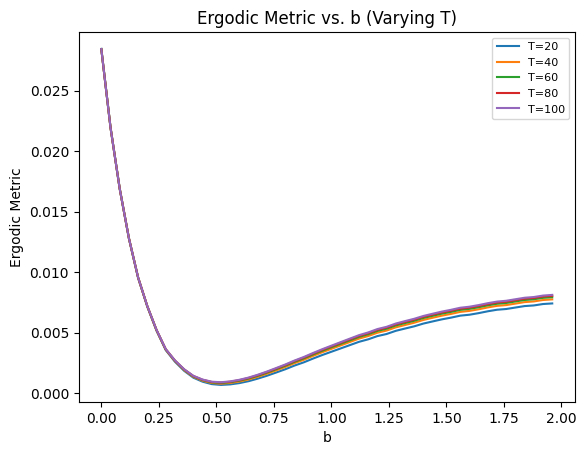

In [19]:
for i in range(5):
    plt.plot(bs[i],Es[i])
    
plt.title('Ergodic Metric vs. b (Varying T)')
plt.xlabel('b')
plt.ylabel('Ergodic Metric')
plt.legend(['T=20','T=40','T=60','T=80','T=100'], loc="best", prop={'size': 8})
plt.show()